# 펭귄 샘플 데이터를 이용한 머신러닝 프로세스(파이프라인) 예제

모델의 목적: 체중 예측 

In [1]:
# cikit-learn
import sklearn
sklearn.__version__

'1.1.1'

In [4]:
import seaborn as sns 

df_p = sns.load_dataset('penguins')
df_p = df_p.dropna() # 이빠진 데이터 제거 

print(f'data shape: {df_p.shape}')
display(df_p.head(3))

data shape: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [7]:
# 데이터셋 만들기 
y = df_p['body_mass_g']             # 체중을 y로 
X = df_p.drop('body_mass_g', axis=1)  # y를 뺀 나머지 

In [9]:
X.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
0,Adelie,Torgersen,39.1,18.7,181.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,Male


In [10]:
# train, test로 분리
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # 8:2 비율료
print(f'전체 데이터: {X.shape[0]}') # 데이터열의 수 = 데이터 사이즈 
print(f'train set 데이터 수: {X_train.shape[0]}') # for train
print(f'test set 데이터 수: {X_test.shape[0]}') # for test

전체 데이터: 333
train set 데이터 수: 266
test set 데이터 수: 67


In [17]:
# one-hot encoder 하기 
from sklearn.preprocessing import OneHotEncoder 

# 컬럼 이름
print(X.columns)



Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'sex'],
      dtype='object')


In [20]:
cols_cat = ['species', 'island', 'sex']

X_train[cols_cat].head(5)

,species,island,sex
238,Gentoo,Biscoe,Female
314,Gentoo,Biscoe,Female
237,Gentoo,Biscoe,Male
165,Chinstrap,Dream,Male
48,Adelie,Dream,Female


In [21]:
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train[cols_cat])
print(X_train_ohe.toarray()[:5])

[[0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0.]]


In [22]:
# one hot encoding 된 것 분석하면
# Adelie | Chinstrap | Gentoo | Biscoe | Dream | 모르는 무언가 | Female | Male

In [23]:
X_test_ohe = ohe.transform(X_test[cols_cat])
print(X_test_ohe.toarray()[:5])

[[1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1.]]


In [32]:
cols_for_scale = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']   # 숫자값으로 되어 있는 것들만 골라서
X_train[cols_for_scale].head(5)     

,bill_length_mm,bill_depth_mm,flipper_length_mm
238,46.2,14.5,209.0
314,44.5,14.7,214.0
237,49.2,15.2,221.0
165,52.0,18.1,201.0
48,36.0,17.9,190.0


In [33]:
from sklearn.preprocessing import StandardScaler 

stdS = StandardScaler()
X_train_scaled = stdS.fit_transform(X_train[cols_for_scale])
print(X_train_scaled[:5])

[[ 3.90022325e-01 -1.37423204e+00  5.65483453e-01]
 [ 7.80320625e-02 -1.27005828e+00  9.19243092e-01]
 [ 9.40593375e-01 -1.00962388e+00  1.41450659e+00]
 [ 1.45445969e+00  5.00895634e-01 -5.31969382e-04]
 [-1.48191925e+00  3.96721874e-01 -7.78803175e-01]]


In [34]:
X_test_scaled = stdS.fit_transform(X_test[cols_for_scale])
print(X_test_scaled[:5])

[[-0.303449    1.04326709 -0.0600275 ]
 [-0.0304264  -1.43641259  1.42954381]
 [-0.43085954  1.79184964 -0.43242033]
 [ 1.6623137   1.27719914  0.31236533]
 [-0.81309118  0.62218941 -0.80481315]]


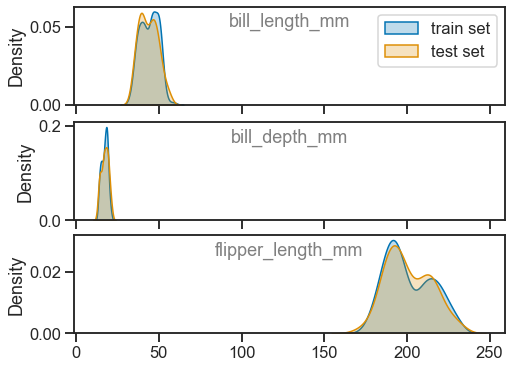

In [35]:
sns.set_style('ticks')
sns.set_palette('colorblind')
sns.set_context('talk')

import matplotlib.pyplot as plt 

fig, axs = plt.subplots(nrows=3, figsize=(7,5), constrained_layout=True, sharex=True)
for ax, col in zip(axs, ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']):
    sns.kdeplot(x=col, data=X_train, fill=True, ax=ax, label='train set')
    sns.kdeplot(x=col, data=X_test, fill=True, ax=ax, label='test set')
    ax.text(0.5, 0.8, col, ha='center', transform=ax.transAxes, color='gray')
    ax.set_xlabel('')

axs[0].legend()

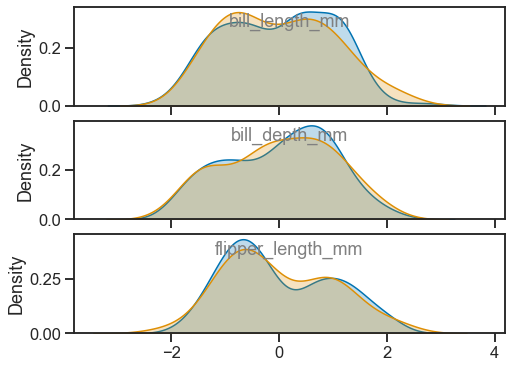

In [36]:
fig, axs = plt.subplots(nrows=3, figsize=(7,5), constrained_layout=True, sharex=True)
for i, ax in enumerate(axs):
    sns.kdeplot(X_train_scaled[:, i], fill=True, ax=ax)
    sns.kdeplot(X_test_scaled[:, i], fill=True, ax=ax)
    ax.text(0.5, 0.8, cols_for_scale[i], ha='center', transform=ax.transAxes, color='gray')
    ax.set_xlabel('')

In [37]:
# dataset 결합 
print(X_train_ohe.toarray().shape)
print(X_train_scaled.shape)

(266, 8)
(266, 3)


In [40]:
import numpy as np 

X_train_final = np.concatenate([X_train_ohe.toarray(), X_train_scaled], axis=1)     # axis=1: 열병합 
X_test_final = np.concatenate([X_test_ohe.toarray(), X_test_scaled], axis=1)        # axis=1: 열병합 
print(X_train_final.shape)

(266, 11)


In [56]:
# ML학습 
from sklearn.ensemble import RandomForestRegressor # Decision Tree 앙상블 모델 
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()
rfr.fit(X_train_final, y_train)

RandomForestRegressor()

In [57]:
y_train_pred = rfr.predict(X_train_final)    # 학습 X 데이터로 y 예측
y_test_pred = rfr.predict(X_test_final)      # 평가 X 데이터로 y 예측

print(f'R2 for train dataset = {r2_score(y_train, y_train_pred):.03f}')   # Train 데이터셋 정확도 
print(f'R2 for test dataset = {r2_score(y_test, y_test_pred):.03f}')      # Test 데이터셋 정확도 

R2 for train dataset = 0.981
R2 for test dataset = 0.810


In [54]:
# Visualization 

def plot_parity(X_train, X_val, y_train, y_val, model):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True,
                            sharex=True, sharey=True)

    y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
    r2_train, r2_val = r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)

    for (ax, y_true, y_pred, c, r2, label) in zip(axs, [y_train, y_val], [y_train_pred, y_val_pred], ["g", "m"], [r2_train, r2_val], ["train", "test"]):
        ax.scatter(y_true, y_pred, c=c, label=f'R2={r2:.3f}', alpha=0.5)
        ax.legend(loc='lower right')
        ax.set_xlabel('true')
        ax.set_title(f'{label}', fontsize=20, color='gray', pad=12)
        
        if ax == axs[0]:
            ax.set_ylabel('predict', labelpad=12)

        ymin = min(y_train.min(), y_val.min())

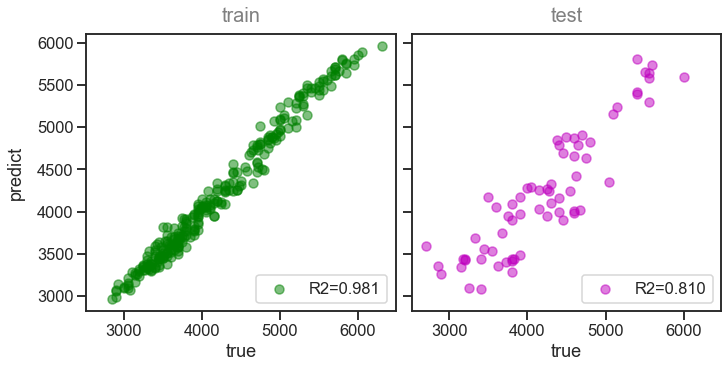

In [58]:
plot_parity(X_train_final, X_test_final, y_train, y_test, rfr) 

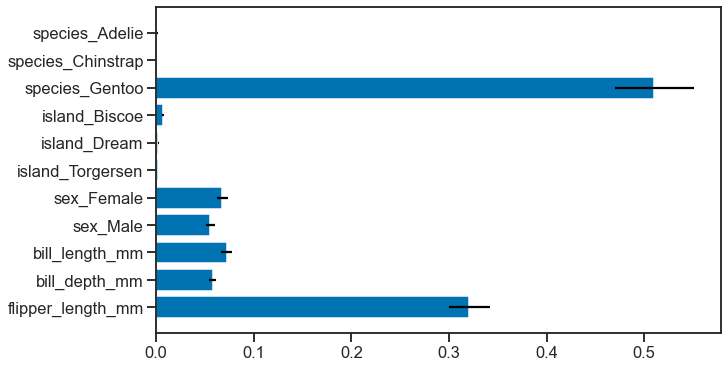

In [66]:
# 인자(컬럼)의 중요도 검즘 
# 인자별로 퍼뮤테이션(한마디로 잘못된 값으로 변경)해서 결과와 상관관계를 찾는 것 

from sklearn.inspection import permutation_importance 

pi = permutation_importance(rfr, X_train_final, y_train, n_repeats=30) # 인자별 30번 섞기 

# 컬럼이 현재 11개 임 (원핫샷+스케일 값)
col_names = [
    'species_Adelie',
    'species_Chinstrap',
    'species_Gentoo',
    'island_Biscoe',
    'island_Dream',
    'island_Torgersen',
    'sex_Female',
    'sex_Male',
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm'
]

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.barh(col_names, pi.importances_mean, xerr=pi.importances_std)
ax.invert_yaxis()

categorization 된 것들에 대해 중요도 파악이 힘듦... 

그래서!!! 아래처럼 파이프라인으로 한다 

# 위 예제를 Pipeline으로 구축하기

In [62]:
# 파이프라인 생성

from sklearn.compose import ColumnTransformer # 컬럼 단위로 Transform 
from sklearn.pipeline import Pipeline 

# 1. category 피처 or 말로 표현된 것들에 one-hot 인코딩 
cat_features = ['species', 'island', 'sex']
cat_transformer = OneHotEncoder()

# 2. number에 scale 하기 
num_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
num_transformer = StandardScaler()

# 3. 전처리기 생성
preprocessor = ColumnTransformer([
    ('cat', cat_transformer, cat_features),
    ('num', num_transformer, num_features)
])

# 4. Piple 라인 생성
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor()) # 주의: 인스턴스를 넘긴다
])


In [67]:
# for Visualization 
from sklearn import set_config 

set_config(display='diagram') # display='text'
# 5. Training 
pipeline.fit(X_train, y_train) # Training 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'island', 'sex']),
                                                 ('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('rf', RandomForestRegressor())])

<BarContainer object of 6 artists>

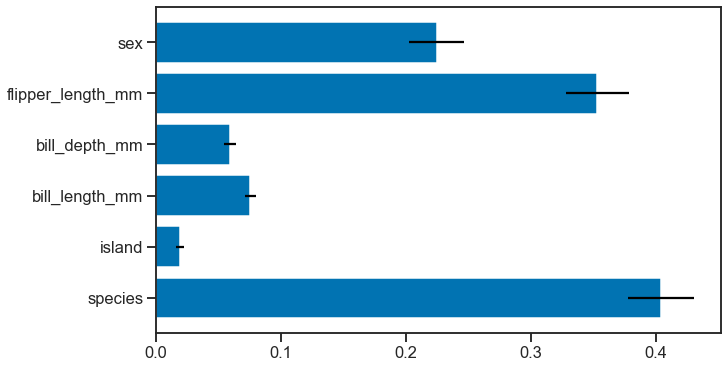

In [68]:
pi = permutation_importance(pipeline, X_train, y_train, n_repeats=30)

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.barh(X_train.columns, pi.importances_mean, xerr=pi.importances_std)

결론: Species(종)은 정말 중요한 요소. 반면 섬이난 부리 정보는 몸무게와 별로 관련성이 없다. 


# 위 pipeline을 응용한 캘리포니아 집값 분석

In [70]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [90]:
print('keys: ', end='')
for k in housing.keys():
    print(k,end=', ')
print()
print('feautre names: ', end='')
for data in housing['feature_names']:
    print(data, end=', ')
print()

keys: data, target, frame, target_names, feature_names, DESCR, 
feautre names: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, 


In [72]:
# Pandas 데이터 타입으로 변경 하여 X를 생성 
import pandas as pd

X = pd.DataFrame(data=housing["data"], columns=housing["feature_names"])
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [73]:
# 컬럼 이름
print(X.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [80]:
y = housing['target']
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [76]:
# train, test로 분리
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # 8:2 비율료
print(f'전체 데이터: {X.shape[0]}') # 데이터열의 수 = 데이터 사이즈 
print(f'train set 데이터 수: {X_train.shape[0]}') # for train
print(f'test set 데이터 수: {X_test.shape[0]}') # for test

전체 데이터: 20640
train set 데이터 수: 16512
test set 데이터 수: 4128


In [77]:
# 파이프라인 생성

from sklearn.compose import ColumnTransformer # 컬럼 단위로 Transform 
from sklearn.pipeline import Pipeline 


# 1. number에 scale 하기 
num_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']
num_transformer = StandardScaler()

# 2. 전처리기 생성
preprocessor = ColumnTransformer([
    #('cat', cat_transformer, cat_features),
    ('num', num_transformer, num_features)
])

# 4. Piple 라인 생성
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfr', RandomForestRegressor()) # 주의: 인스턴스를 넘긴다
])


In [78]:
# for Visualization 
from sklearn import set_config 

set_config(display='diagram') # display='text'
# 5. Training 
pipeline.fit(X_train, y_train) # Training 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('rfr', RandomForestRegressor())])

<BarContainer object of 8 artists>

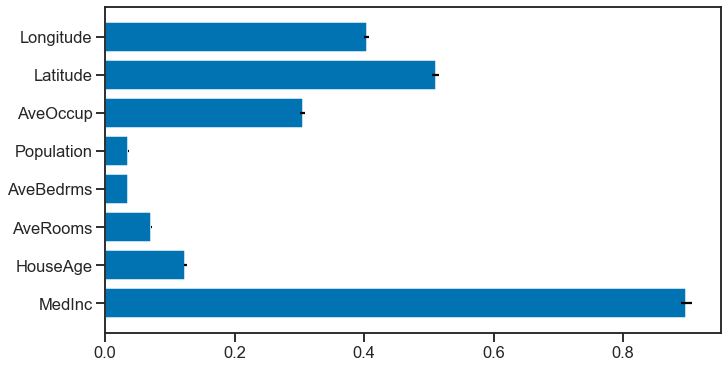

In [79]:
pi = permutation_importance(pipeline, X_train, y_train, n_repeats=30)

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.barh(X_train.columns, pi.importances_mean, xerr=pi.importances_std)